# Least Squares Estimation

## Instructions
In this assignment you will use LS estimation in two datasets and compare it to Gradient Descent.

#### 1. hight and weight:
given hights of people you will estimate weight of those people by LS and then compare it with Gradient Descent.

#### 2. Load News popularity data:
This is a dataset of news with some parameters to predict how many shares every news get.
To get more familar with the dataset please open `OnlineNewsPopularity.csv` and check the columns.


In [56]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms.
Consider the case where we have a linear model for predicting housing prices. We are predicting the housing prices based on features in the 
housing dataset. If we denote the features as $\boldsymbol x_0, \dotsc, \boldsymbol x_n$ and collect them into a vector $\boldsymbol {x}$, and the price of the houses as $y$. Assuming that we have 
a prediction model in the way such that $\hat{y}_i =  f(\boldsymbol {x}_i) = \boldsymbol \theta^T\boldsymbol {x}_i$.


If we collect the dataset into a $(N,D)$ data matrix $\boldsymbol X$, we can write down our model like this:

$$
\begin{bmatrix} 
\boldsymbol{x}_1^T \\
\vdots \\ 
\boldsymbol{x}_N^T 
\end{bmatrix} \boldsymbol{\theta} = \begin{bmatrix} 
y_1 \\
\vdots \\ 
y_2 
\end{bmatrix},
$$

i.e.,

$$
\boldsymbol X\boldsymbol{\theta} = \boldsymbol{y}.
$$

Note that the data points are the *rows* of the data matrix, i.e., every column is a dimension of the data. 

## Load the first data: Height and weight


In [57]:
def load_first_data(sub_sample=True, add_outlier=False):
    """Load data and convert it to the metric system."""
    
    path_dataset = "height_weight_genders.csv"
    
    data = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[1, 2])
    height = data[:, 0]
    weight = data[:, 1]
    gender = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1, usecols=[0],
        converters={0: lambda x: 0 if b"Male" in x else 1})
    # Convert to metric system
    height *= 0.025
    weight *= 0.454

    # sub-sample
    if sub_sample:
        height = height[::50]
        weight = weight[::50]

    if add_outlier:
        # outlier experiment
        height = np.concatenate([height, [1.1, 1.2]])
        weight = np.concatenate([weight, [51.5/0.454, 55.3/0.454]])
    
    return height, weight, gender

## Standardizing the data
In this function we will standarize the dataset:
$$x = \frac{x - \mu}{\sigma}$$

In [59]:
def standardize(x):
    """
    Standardize the original data set.
    :param x: the numpy array 
    :returns: standardized_x, mean_x, std_x
    """
    # Your code here
    x = np.array(x)
    mean_x = np.sum(x) / len(x)
    std_x = np.std(x)
    x = (x - mean_x) / std_x
    #raise NotImplementedError # delete this line after finishing this function
    return x, mean_x, std_x

In [60]:
def build_model_data(height, weight):
    """Form (y,tX) to get regression data in matrix form."""
    y = weight
    x = height
    num_samples = len(y)
    tx = np.c_[np.ones(num_samples), x]
    return y, tx

## Height and weight

In [61]:
height, weight, gender = load_first_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

print(f"mean_x, std_x: {mean_x, std_x}")
b.shape, A.shape
epsilon = 1e-5

mean_x, std_x: (1.6591889938705313, 0.09618339348893848)


## Plotting the data

Text(0, 0.5, 'weight')

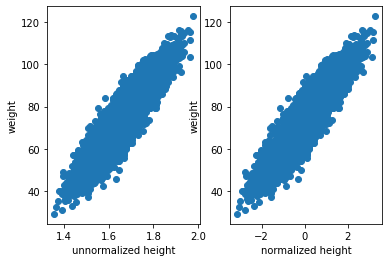

In [62]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1, 2, 1)
plt.scatter(height, b)
plt.xlabel('unnormalized height')
plt.ylabel('weight')
plt.subplot(1, 2, 2)
plt.scatter(A[:, 1], b)
plt.xlabel('normalized height')
plt.ylabel('weight')

# Calculate LS
Consider the case where we have a linear model for predicting housing prices. We are predicting the housing prices based on features in the 
housing dataset. If we denote the features as $\boldsymbol x_0, \dotsc, \boldsymbol x_n$ and collect them into a vector $\boldsymbol {x}$, and the price of the houses as $y$. Assuming that we have 
a prediction model in the way such that $\hat{y}_i =  f(\boldsymbol {x}_i) = \boldsymbol \theta^T\boldsymbol {x}_i$.


If we collect the dataset into a $(N,D)$ data matrix $\boldsymbol X$, we can write down our model like this:

$$
\begin{bmatrix} 
\boldsymbol{x}_1^T \\
\vdots \\ 
\boldsymbol{x}_N^T 
\end{bmatrix} \boldsymbol{\theta} = \begin{bmatrix} 
y_1 \\
\vdots \\ 
y_2 
\end{bmatrix},
$$

i.e.,

$$
\boldsymbol X\boldsymbol{\theta} = \boldsymbol{y}.
$$

Note that the data points are the *rows* of the data matrix, i.e., every column is a dimension of the data. 

Our goal is to find the best $\boldsymbol\theta$ such that we minimize the following objective (least square).

$$
\begin{eqnarray} 
& \sum^n_{i=1}{\lVert \bar{y_i} - y_i \rVert^2} \\
&= \sum^n_{i=1}{\lVert \boldsymbol \theta^T\boldsymbol{x}_i - y_i \rVert^2} \\
&= (\boldsymbol X\boldsymbol {\theta} - \boldsymbol y)^T(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y).
\end{eqnarray}
$$

If we set the gradient of the above objective to $\boldsymbol  0$, we have
$$
\begin{eqnarray} 
\nabla_\theta(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y)^T(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\nabla_\theta(\boldsymbol {\theta}^T\boldsymbol X^T - \boldsymbol y^T)(\boldsymbol X\boldsymbol {\theta} - \boldsymbol y) &=& \boldsymbol 0 \\
\nabla_\theta(\boldsymbol {\theta}^T\boldsymbol X^T\boldsymbol X\boldsymbol {\theta} - \boldsymbol y^T\boldsymbol X\boldsymbol \theta - \boldsymbol \theta^T\boldsymbol X^T\boldsymbol y + \boldsymbol y^T\boldsymbol y ) &=& \boldsymbol 0 \\
2\boldsymbol X^T\boldsymbol X\theta - 2\boldsymbol X^T\boldsymbol y &=& \boldsymbol 0 \\
\boldsymbol X^T\boldsymbol X\boldsymbol \theta        &=& \boldsymbol X^T\boldsymbol y.
\end{eqnarray}
$$

The solution that gives zero gradient solves (which we call the maximum likelihood estimator) the following equation:

$$\boldsymbol X^T\boldsymbol X\boldsymbol \theta = \boldsymbol X^T\boldsymbol y.$$

_This is exactly the same as the normal equation we have for projections_.

This means that if we solve for $\boldsymbol X^T\boldsymbol X\boldsymbol \theta = \boldsymbol X^T\boldsymbol y.$ we would find the best $\boldsymbol \theta = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y$, i.e. the $\boldsymbol \theta$ which minimizes our objective.

In this section we try to calculate the LS for prdicting our data by solving the exact equation:

$$A^t A x = A^t b$$

Please fill in the functions `solve_least_square` below:

In [63]:
def solve_least_square(A, b):
    # YOUR CODE HERE
    # You can use library routines in `np.linalg.*`
    b = np.array(b)
    A = np.array(A)
    x = (np.linalg.inv(A.T@A))@A.T@b
    return x

## Plotting the line
Call `solve_least_square` and plot the line on the data.

you can use `plt.plot(x, ax+b, "RED")` for plotting the y=ax+b line

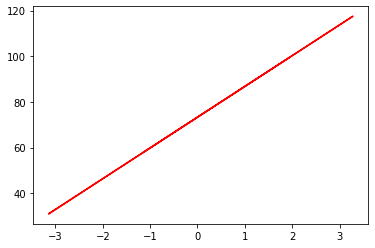

In [64]:
# YOUR CODE HERE
xstar = solve_least_square(A, b)
plt.plot(x ,A@xstar, "RED")
#raise NotImplementedError

In [65]:
xstar

array([73.293922  , 13.47971243])

# 2. Gradient Descent
Gradient Descent is an iterative optimization algorithm to find the minimum of a function.

Here that function is our Loss Function which is the Least Square function.

In this section, we try to calculate the LS of the same data by an iterative algorithm.
we have LS as our loss function. Our goal is to minimize this loss function to obtain the most accurate value for weight.
<img src="gd.png " width="600" align="center">
This algorithm consists of 4 steps:
### Step 1
initialling the values to x (ex. [1, 1]).

Let (`L`) be our learning rate. This controls how much the value of x changes with each step. L could be a small value for good accuracy.

### Step 2
Calculate the gradient of the loss function (`G`).

### Step 3
Now we update the current value of `x` using the following equation:
`x` = `x` - `L` * `G`

### Step 4
We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy).

The value of x that we are left with now will be the optimum value.


## Computing the Objective Function
Fill in the `calculate_objective` function below:

where `Axmb` is given and we just want to compute the LS where  `Axmb` = $Ax - b$

In [66]:
def calculate_objective(Axmb):
    """
    Calculate the mean squared error for vector Axmb = Ax - b.
    :param Axmb: the n*1 vector of Ax - b
    :return: copmutes the least square of Ax-b
    """
    # Your code here
    out = (np.linalg.norm(Axmb))**2
    return out

Please fill in the functions `compute_gradient` below:

you should calculate the gradient of LS function.

In [125]:
def compute_gradient(b, A, x):
    """
    Computing the gradient of least square error
    :param b: the output that we should estimate
    :param A: the input data that we use it to get b
    :param x: the vector of weights that should minimize the loss functions
    :return: returns the gradient of LS in x, and also Ax-b (as Axmb)
    """
    # YOUR CODE HERE
    grad = 2*A.T@A@x -2*A.T@b
    Axmb = calculate_objective(A@x - b)
    
    return grad, Axmb

Please fill in the functions `gradient_descent` below:

where `gamma` is the learning rate.

In [126]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = [-1]
    x = initial_x
    for n_iter in range(max_iters):
        # TODO: compute gradient and objective function
        grad, obj = compute_gradient(b, A, x)

        # TODO: update x by a gradient descent step
        x = x - gamma*grad
        
        # TODO: store x and objective function value
        xs.append(x)
        objectives.append(obj)
        #print('Ax - b:', objectives[-2])
        if abs(obj - objectives[-2]) < epsilon:
                break
        print("Gradient Descent({bi}/{ti}): objective={l}".format(bi=n_iter, ti=max_iters - 1, l=obj))
    return objectives, xs

## Train your data

You shoud assing values to parameters `max_iters` and `gamma`. you can use `Plotting the lines‍‍‍` and `Plotting the cost per iterations`

In [130]:
import datetime

# Define the parameters of the algorithm. you can use `Plotting the lines‍‍‍` part to check the parameters you choose.

max_iters = 10000 # maximum iteration of the algorithm

gamma = 0.000001 # how big or small every steps are (usually between 0.000001 to 0.1 is ok!)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/9999): objective=55844734.25518336
Gradient Descent(1/9999): objective=53645468.401870206
Gradient Descent(2/9999): objective=51533293.47634824
Gradient Descent(3/9999): objective=49504760.67787698
Gradient Descent(4/9999): objective=47556557.77822516
Gradient Descent(5/9999): objective=45685503.71339955
Gradient Descent(6/9999): objective=43888543.38954105
Gradient Descent(7/9999): objective=42162742.69450733
Gradient Descent(8/9999): objective=40505283.706996955
Gradient Descent(9/9999): objective=38913460.09539198
Gradient Descent(10/9999): objective=37384672.698806584
Gradient Descent(11/9999): objective=35916425.28312595
Gradient Descent(12/9999): objective=34506320.46510628
Gradient Descent(13/9999): objective=33152055.797880176
Gradient Descent(14/9999): objective=31851420.011476245
Gradient Descent(15/9999): objective=30602289.402213898
Gradient Descent(16/9999): objective=29402624.36507834
Gradient Descent(17/9999): objective=28250466.06341335
Gradient Desce

Gradient Descent(291/9999): objective=308152.42630687606
Gradient Descent(292/9999): objective=308135.21341723675
Gradient Descent(293/9999): objective=308118.6821580271
Gradient Descent(294/9999): objective=308102.80553668214
Gradient Descent(295/9999): objective=308087.5576295423
Gradient Descent(296/9999): objective=308072.91353952535
Gradient Descent(297/9999): objective=308058.849355473
Gradient Descent(298/9999): objective=308045.3421131092
Gradient Descent(299/9999): objective=308032.36975754297
Gradient Descent(300/9999): objective=308019.91110725724
Gradient Descent(301/9999): objective=308007.94581952266
Gradient Descent(302/9999): objective=307996.45435718243
Gradient Descent(303/9999): objective=307985.4179567509
Gradient Descent(304/9999): objective=307974.81859777647
Gradient Descent(305/9999): objective=307964.63897341746
Gradient Descent(306/9999): objective=307954.86246218294
Gradient Descent(307/9999): objective=307945.47310079343
Gradient Descent(308/9999): objective

Gradient Descent(592/9999): objective=307717.75964779215
Gradient Descent(593/9999): objective=307717.7595578524
Gradient Descent(594/9999): objective=307717.75947147445
Gradient Descent(595/9999): objective=307717.75938851683
Gradient Descent(596/9999): objective=307717.7593088445
Gradient Descent(597/9999): objective=307717.75923232705
Gradient Descent(598/9999): objective=307717.75915883976
Gradient Descent(599/9999): objective=307717.7590882627
Gradient Descent(600/9999): objective=307717.7590204803
Gradient Descent(601/9999): objective=307717.7589553823
Gradient Descent(602/9999): objective=307717.75889286195
Gradient Descent(603/9999): objective=307717.7588328175
Gradient Descent(604/9999): objective=307717.75877515075
Gradient Descent(605/9999): objective=307717.7587197677
Gradient Descent(606/9999): objective=307717.75866657775
Gradient Descent(607/9999): objective=307717.75861549424
Gradient Descent(608/9999): objective=307717.7585664335
Gradient Descent(609/9999): objective=3

## Plotting the lines

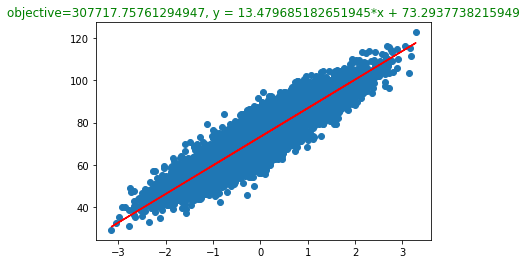

In [137]:
plt.scatter(A[:, 1], b)
for i in range(1, len(gradient_xs_naive)):
    beta, alpha = gradient_xs_naive[i]
    if len(gradient_xs_naive)-1 == i:
        plt.plot(x, alpha *x + beta, "RED")
    plt.title(f'objective={gradient_objectives_naive[-1]}, y = {alpha}*x + {beta}', color="g")

## Plotting the cost per iterations

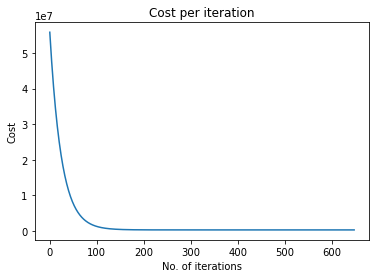

In [138]:
plt.plot(gradient_objectives_naive[1:])
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

# 3. Load News popularity data
This is a dataset of news with parameters for prediction how many shares every news get.
To get more familar with the dataset please open `OnlineNewsPopularity.csv` and check the columns.

In [89]:
def load_news_data(sub_sample=True):
    """Load data and convert it to the metric system."""
    
    path_dataset = "OnlineNewsPopularity.csv"
    
    data = np.genfromtxt(
        path_dataset, delimiter=",", skip_header=1)
    
    data = data[:, 1:-2]
    shares = data[:, -1]

    # sub-sample
    if sub_sample:
        data = data[::50]
        shares = shares[::50]
    
    return data, shares

In [90]:
data, shares = load_news_data(sub_sample=False)

In [91]:
data.shape,shares.shape

((39644, 58), (39644,))

# Compute LS using exact formulation

In [93]:
def compute_least_square(A, b, x):
    
    # YOUR CODE HERE
    A = np.array(A)
    b = np.array(b)
    x = np.array(x)
    sum = 0
    for index, row in enumerate(A):
        sum += row@x - b[index]
    return sum

In [97]:
compute_least_square(A, b, [73.293922  , 13.47971243])

-2.1051978279729155e-05

## Test the estimation
you can compare your estimation to the real value of `shares` bellow:
you can also plot the data

In [ ]:
# YOUR CODE HERE (OPTIONAL)